<a href="https://colab.research.google.com/github/stanimman/2015/blob/master/OCR_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [6]:
!ls drive/My\ Drive/0325updated.task1train\(626p\)\X00016469612.txt

 X00016469612.jpg	 X51005757248.txt	 X51006619783.txt
 X00016469612.txt	 X51005757273.jpg	 X51006619785.jpg
 X00016469619.jpg	 X51005757273.txt	 X51006619785.txt
 X00016469619.txt	 X51005757286.jpg	 X51006619854.jpg
 X00016469620.jpg	 X51005757286.txt	 X51006619854.txt
 X00016469620.txt	 X51005757290.jpg	 X51006619862.jpg
 X00016469622.jpg	 X51005757290.txt	 X51006619862.txt
 X00016469622.txt	'X51005757294 (1).txt'	 X51006620161.jpg
 X00016469623.jpg	 X51005757294.jpg	 X51006620161.txt
 X00016469623.txt	 X51005757294.txt	 X51006620176.jpg
 X00016469669.jpg	'X51005757304 (1).txt'	 X51006620176.txt
 X00016469669.txt	 X51005757304.jpg	'X51006620181 (1).txt'
 X00016469672.jpg	 X51005757304.txt	 X51006620181.jpg
 X00016469672.txt	'X51005757323 (1).txt'	 X51006620181.txt
 X00016469676.jpg	 X51005757323.jpg	'X51006620186 (1).txt'
 X00016469676.txt	 X51005757323.txt	 X51006620186.jpg
 X51005200938.jpg	'X51005757324 (1).txt'	 X51006620186.txt
 X51005200938.txt	 X51005757324.jpg	'X51006620187 (1

In [15]:
import os

In [22]:
!cat drive/My\ Drive/0325updated.task1train\(626p\)/X00016469612.txt

72,25,326,25,326,64,72,64,TAN WOON YANN
50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
205,121,285,121,285,139,205,139,789417-W
110,144,383,144,383,163,110,163,NO.53 55,57 & 59, JALAN SAGU 18,
192,169,299,169,299,187,192,187,TAMAN DAYA,
162,193,334,193,334,211,162,211,81100 JOHOR BAHRU,
217,216,275,216,275,233,217,233,JOHOR.
50,342,279,342,279,359,50,359,DOCUMENT NO : TD01167104
50,372,96,372,96,390,50,390,DATE:
165,372,342,372,342,389,165,389,25/12/2018 8:13:39 PM
48,396,117,396,117,415,48,415,CASHIER:
164,397,215,397,215,413,164,413,MANIS
49,423,122,423,122,440,49,440,MEMBER:
191,460,298,460,298,476,191,476,CASH BILL
30,508,121,508,121,523,30,523,CODE/DESC
200,507,247,507,247,521,200,521,PRICE
276,506,306,506,306,522,276,522,DISC
374,507,441,507,441,521,374,521,AMOUNT
69,531,102,531,102,550,69,550,QTY
221,531,247,531,247,545,221,545,RM
420,529,443,529,443,547,420,547,RM
27,570,137,570,137,583,27,583,9556939040116
159,570,396,570,396,584,159,584,KF MODELLING CLAY KIDDY FIS

In [33]:
file_path =  'drive/My Drive/0325updated.task1train(626p)'

In [34]:
print(os.path.join(file_path,"X00016469612.txt"))

drive/My Drive/0325updated.task1train(626p)/X00016469612.txt


In [46]:
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
from PIL import Image
im = Image.open(os.path.join(file_path,"X00016469619.jpg"))

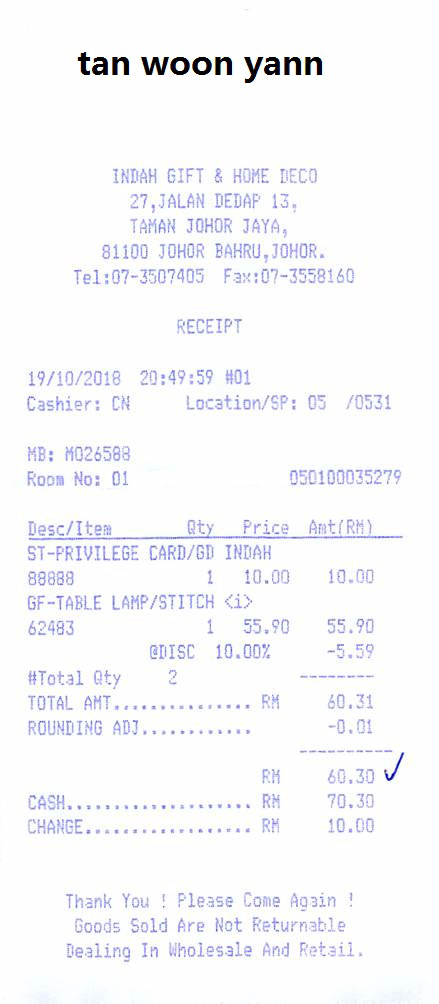

In [47]:
im

In [49]:
import cv2
import numpy as np

large = cv2.imread(os.path.join(file_path,"X00016469619.jpg"))
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)



In [50]:
x1, y2, w3, h4 = cv2.boundingRect(contours[0])
print(x1,y2,w3,h4)

32 470 150 12


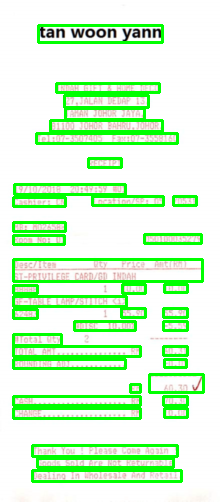

In [51]:
img = Image.fromarray(rgb, 'RGB')
img.save('my.png')
img